In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

FOLDERNAME = 'NIPA/a-yo-image/initial-experiments/mongoose/data'
assert FOLDERNAME is not None, "[!] Enter the foldername."

import sys
sys.path.append('/content/drive/MyDrive/{}'.format(FOLDERNAME))

# Change dariectory to current folder
%cd /content/drive/MyDrive/$FOLDERNAME

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/NIPA/a-yo-image/initial-experiments/mongoose/data


In [3]:
"""
Summarize: This function is load npy files and separate into x_data and y_data. and make a label_data.
Input:
    - File Shape: (num, frames, h, w, c)
    - Type: string(npy file path)
    - Example: (9, 10, 128, 128, 4)
Output:
    - Shape: ((num * 9, h, w, c), (num * 9, h, w, c), (num, 10))
    - Type: ndarray, ndarray, ndarray
    - Example: ((45, 128, 128, 4), (45, 128, 128, 4), (45, 10))
"""

def dataset_packing(path_npy, shuffle = False) :
  dataset = np.load(path_npy)
  # Split into train and validation sets using indexing to optimize memory.
  dataset = dataset/255
  size =  dataset.shape[0]
  x_data = np.empty((0, 128, 128, 4))
  y_data = np.empty((0, 128, 128, 4))
  label_data = np.empty((0, 10))
  for i in range(size):
    x_dataset = dataset[i,0,:,:,:]
    x_dataset = np.expand_dims(x_dataset, axis=0)
    x_dataset = np.repeat(x_dataset, 9, axis=0)
    x_data = np.concatenate((x_data, x_dataset), axis=0)

    y_dataset = dataset[i,1:,:,:,:]
    y_data = np.concatenate((y_data, y_dataset), axis=0)
    label_dataset = np.zeros((9, 10))

    for j in range(0,9) :
      label_dataset[j,j + 1] = 1

    label_data = np.concatenate((label_data, label_dataset), axis=0)

  indexes = np.arange(size * 9)
  if shuffle :
    np.random.shuffle(indexes)

  x_data = x_data[indexes]
  y_data = y_data[indexes]
  label_data = label_data[indexes]

  print('data set shape----------------')
  print(x_data.shape)
  print(y_data.shape)
  print(label_data.shape)

  return x_data, y_data, label_data

In [4]:
"""
Summarize: This function is Visualize the input array.
Input:
    - Shape: (img_num, h, w, c), _, _
    - Type: nparray, int, bool
    - Example: (45, 128, 128, 4), 45, False
"""
def Visualize(img_array, n = 50, turn_off_alpha = False) :
  plt.figure(figsize=(16, 16))
  for i in range(n):
      # 원본 이미지
      ax = plt.subplot(5, 10 , i + 1 )
      if not turn_off_alpha :
        plt.imshow(img_array[i].reshape(128, 128, 4), cmap="gray")
      else :
        plt.imshow(img_array[i][:,:,:3].reshape(128, 128, 3), cmap="gray")
      plt.axis("off")

  plt.show()

In [5]:
"""
Summarize: This function is change invisible pixels in input img_array to white color(1, 1, 1).
Input:
    - Shape: (img_num, h, w, c)
    - Type: nparray
    - Example: (45, 128, 128, 4)
Output:
    - Shape: (img_num, h, w, c)
    - Type: nparray
    - Example: (45, 128, 128, 4)
"""
def fix_img(nparray) :
  zero_coords = (nparray[:,:,:,3] == 0)
  nparray[zero_coords] = (1,1,1,0)

  return nparray

In [6]:
"""
Summarize: This function is loads and separates the dataset with the corresponding file name and saves it as an npz file
Input:
    - File Shape: (num, frames, h, w, c)
    - Type: string
    - Example: (45, 10, 128, 128, 4)
"""
def save_npz(file_name) :
  x_train, y_train, label_train = dataset_packing('./' + file_name)
  fix_img(x_train)
  fix_img(y_train)
  np.savez(file_name.replace('.npy', '') + '_fixed.npz', x_data=x_train, y_data=y_train, label_data=label_train)

In [7]:
file_list = [f for f in os.listdir('.') if os.path.isfile(f) and f.endswith('.npy')]
print(file_list)

['data_run.npy', 'data_run_offset.npy', 'data_run_offset_flip.npy', 'data_run_offset_flip_fix.npy', 'png_eliminate_0.npy', 'png_only_0.npy']


In [8]:
for file_name in file_list :
  save_npz(file_name)

data set shape----------------
(450, 128, 128, 4)
(450, 128, 128, 4)
(450, 10)
data set shape----------------
(2295, 128, 128, 4)
(2295, 128, 128, 4)
(2295, 10)
data set shape----------------
(2295, 128, 128, 4)
(2295, 128, 128, 4)
(2295, 10)
data set shape----------------
(2295, 128, 128, 4)
(2295, 128, 128, 4)
(2295, 10)
data set shape----------------
(405, 128, 128, 4)
(405, 128, 128, 4)
(405, 10)
data set shape----------------
(54, 128, 128, 4)
(54, 128, 128, 4)
(54, 10)


In [12]:
file_list = [f for f in os.listdir('.') if os.path.isfile(f) and f.endswith('.npz')]
print(file_list)

['data_run_fixed.npz', 'data_run_offset_fixed.npz', 'data_run_offset_flip_fixed.npz', 'data_run_offset_flip_fix_fixed.npz', 'png_eliminate_0_fixed.npz', 'png_only_0_fixed.npz']


In [13]:
npz_data = np.load(file_list[0])

In [14]:
x_train = npz_data['x_data']
y_train = npz_data['y_data']
label_train = npz_data['label_data']


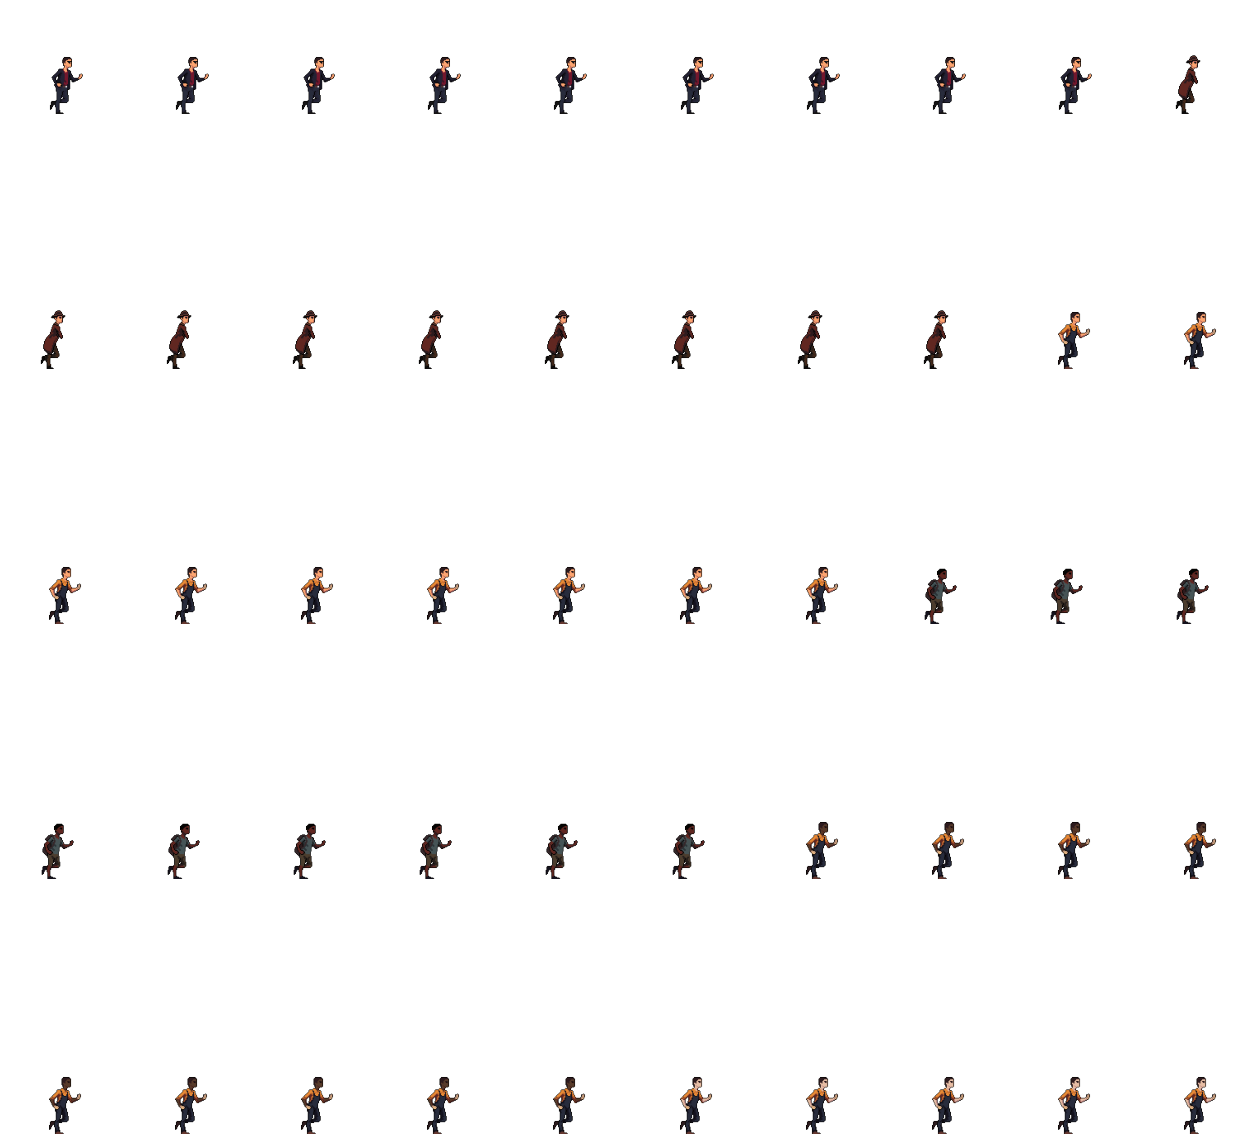

In [18]:
Visualize(x_train, 50, False)

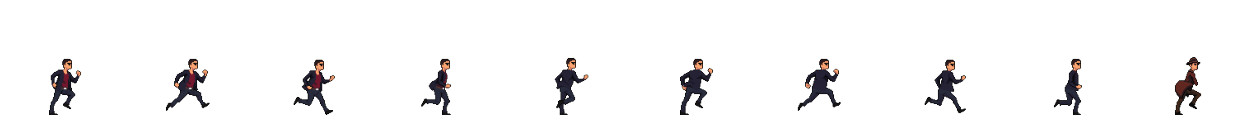

In [19]:
Visualize(y_train, 10, False)

In [20]:
label_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])